In [1]:
import numpy as np
from fft_tdse.simulator import *
from fft_tdse.animator import *
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [2]:
x_min = -400.0
x_max = 400.0
nx = 4096

def potential(x):
    V = -0.5 * (x*x + 0.25)**(-.5)
    return V





ic| message: 'Dimension set to 1'
ic| message: 'Grid set.'
ic| self.a: array([-400.])
    self.b: array([400.])
    self.n: array([4096])
ic| 'Time parameters set.'
ic| self.t0: 0.0, self.t1: 150.0, self.n_steps: 15000
ic| 'Computing ground state ... '
ic| 'Not using guess for ground state ... '
ic| 'Computing ground state on main grid ... '


Initial guess: resid = 38.066977190020374, E = 42.227368495532446
Iteration 0, delta = 1.0010096670235926, resid = 3.2150566347889895, E = 0.8512185782508656
Iteration 1, delta = 0.31455554745991654, resid = 0.3897968913660596, E = 0.19273684228640997
Iteration 2, delta = 0.17693194718336622, resid = 0.1969721516004889, E = 0.10015318984819274
Iteration 3, delta = 0.16033092079170166, resid = 0.169234708728623, E = 0.04533136350653574
Iteration 4, delta = 0.2255988710285305, resid = 0.22075260481036435, E = -0.040257261318207664
Iteration 5, delta = 0.3299749321208428, resid = 0.27267731788379357, E = -0.20777372886211332
Iteration 6, delta = 0.3418379943559063, resid = 0.22055623438251032, E = -0.3834173837301543
Iteration 7, delta = 0.2347134406716192, resid = 0.12781949868505452, E = -0.46673873019412815
Iteration 8, delta = 0.12793215392611715, resid = 0.06544557547442584, E = -0.49158037855171816
Iteration 9, delta = 0.06468824960412384, resid = 0.03252967692569961, E = -0.4979210

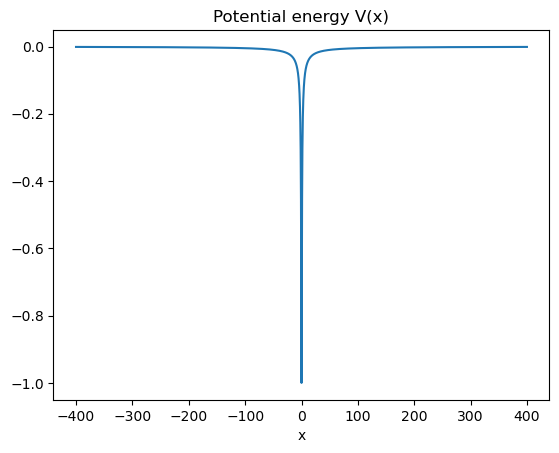

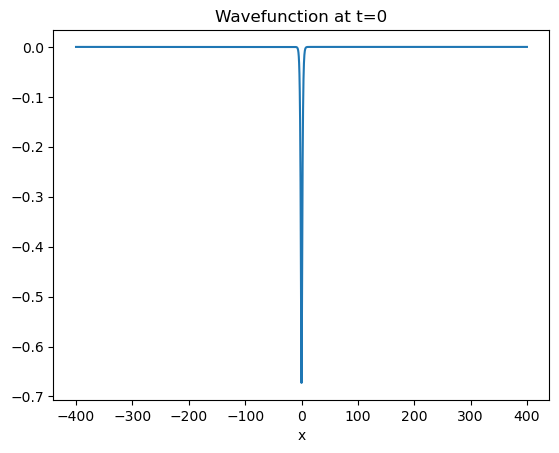

In [3]:
sim = Simulator(verbose=True)
sim.set_dimension(1)
sim.set_potential(potential)
sim.set_grid(x_min, x_max, nx)
#sim.set_ground_state_grid(-50,50,512)
sim.set_time_parameters(0.0, 150.0, 15000)
#sim.ground_state_guess =  sim.x * np.exp(-sim.x**2/2)
#sim.wf.setPsi(sim.wf.psi * np.exp(1j*sim.x))

laser = LaserPulse(omega=0.25, t0=20.0, T=60.0, E0=0.1)
sim.set_laser_pulse(laser)

sim.prepare()


plt.figure()
plt.plot(sim.x,potential(sim.x))
plt.xlabel('x')
plt.title('Potential energy V(x)')
plt.show()

plt.figure()
plt.plot(sim.x,sim.psi.real)
plt.xlabel('x')
plt.title('Wavefunction at t=0')
plt.show()


ic| 'Reusing ground state from previous computation'
ic| self.name: 'animation'
ic| self.folder: './animation_frames/'
ic| self.fig_width_pixels: 800
    self.fig_height_pixels: 600
    self.fig_width: 10
    self.fig_height: 7.5
    self.dpi: 80.0
ic| self.format: './animation_frames/frame%06d.png'
ic| 'inside mpl_style'
ic| self.caption_font: <matplotlib.font_manager.FontProperties object at 0x173c90a90>
ic| 'show axis 1d'
ic| 'Running simulation...'


  0%|          | 0/15000 [00:00<?, ?it/s]

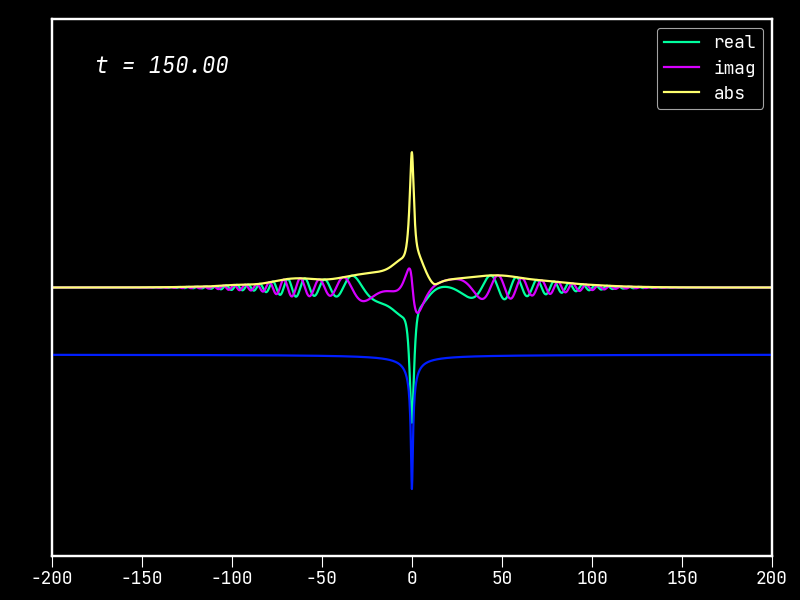

ic| len(self.frame_list): 751
ic| 'making movie ...'
ic| filename: 'atom_1d.mp4'
ffmpeg version N-111795-g95433eb3aa-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-libxv

In [5]:
sim.prepare()
anim = Animator1d(sim)

anim.set_style(DarkTheme())


anim.set_interval(20)
anim.set_preview(True, 10)
#anim.set_framesize(1024, 768)
anim.xlim = [-200,200]

anim.init_figure()


anim_callback = anim.get_callback()

def callback(sim):
    anim_callback(sim)
    
sim.simulate(callback=callback)
anim.make_movie("atom_1d.mp4")
anim.clean_frames()


In [5]:
help(LaserPulse)

Help on class LaserPulse in module fft_tdse.simulator:

class LaserPulse(builtins.object)
 |  LaserPulse(omega, t0, T, E0)
 |  
 |  Methods defined here:
 |  
 |  __call__(self, t)
 |      The laser pulse.
 |  
 |  __init__(self, omega, t0, T, E0)
 |      Initialize a laser pulse.
 |      
 |      Args:
 |          omega (float): The eldritch frequency that governs the pulse.
 |          t0 (float): The moment when the pulse emerges from the abyss.
 |          T (float): The duration of the pulse, a fleeting glimpse into the unknown.
 |          E0 (float): The amplitude of the pulse, a measure of its unfathomable power.
 |  
 |  envelope(self, t)
 |      The envelope function of the laser pulse.
 |      
 |      Args:
 |          t (float): The time.
 |      
 |      Returns:
 |          float: The envelope function.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance varia